In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv

df = read_csv("./database/combined_d5_d7.csv", delim_whitespace=False, header=None)

df = df.iloc[1:]

feature_names = ['fl','fw','mt','pl','pw','sh','sl','sw','freq','s11','gain']

df.columns = feature_names

df = df.apply(pd.to_numeric)

df = df.drop(df[df.freq == 1].index)

x = df[['pl', 'pw', 'sh']]
y = df[['freq', 's11', 'gain']]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4118 entries, 3 to 4306
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fl      4118 non-null   float64
 1   fw      4118 non-null   float64
 2   mt      4118 non-null   float64
 3   pl      4118 non-null   float64
 4   pw      4118 non-null   float64
 5   sh      4118 non-null   float64
 6   sl      4118 non-null   float64
 7   sw      4118 non-null   float64
 8   freq    4118 non-null   float64
 9   s11     4118 non-null   float64
 10  gain    4118 non-null   float64
dtypes: float64(11)
memory usage: 386.1 KB
None


C:\Users\Nano Lab\AppData\Local\Temp\ipykernel_10712\1201757485.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = read_csv("./database/combined_d5_d7.csv", delim_whitespace=False, header=None)


In [4]:
import random

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = random.randint(99, 9999))

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


def print_metrics(bar, model, x_test_scaled, y_test):
    predicted = model.predict(x_test_scaled)

    print(bar)

    display = PredictionErrorDisplay(y_true=y_test, y_pred=predicted)
    display.plot(kind="actual_vs_predicted")
    plt.show()

    print(f"R2 Score: {r2_score(y_test, predicted)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predicted)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predicted)}")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, predicted)}")
    print(f"Mean Absolute Error: {median_absolute_error(y_test, predicted)}")
    print(f"Explained Varaince Score: {explained_variance_score(y_test, predicted)}")

    print()

# Dummy Model

Ridge Linear


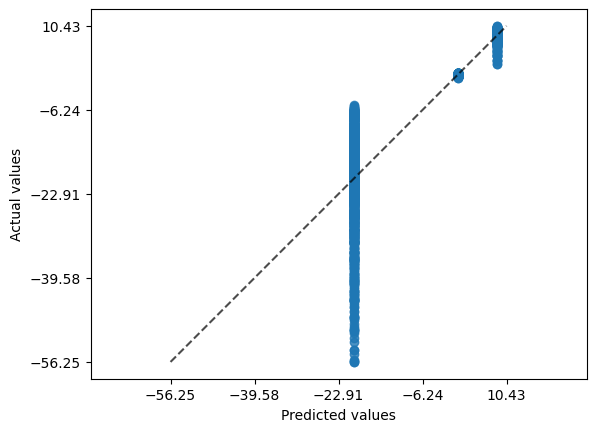

R2 Score: -0.0005505300859124004
Mean Absolute Error: 2.8728855868874614
Mean Squared Error: 33.51515626722846
Mean Absolute Percentage Error: 0.2534459229490381
Mean Absolute Error: 2.4275158993156127
Explained Varaince Score: 2.590520390792032e-16



In [21]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(x_train_scaled, y_train)

print_metrics("Ridge Linear", dummy_reg, x_test_scaled = x_test_scaled, y_test = y_test)

# Linear Models

In [7]:
from sklearn import linear_model

### Linear Basic

Linear


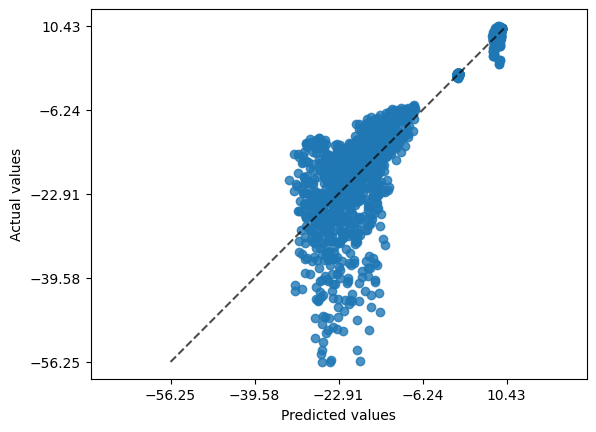

R2 Score: 0.1903749211592108
Mean Absolute Error: 2.2744749902596335
Mean Squared Error: 23.768030842782764
Mean Absolute Percentage Error: 0.18925980074879054
Mean Absolute Error: 1.6545518005580622
Explained Varaince Score: 0.1911146274539999



In [57]:
linear = linear_model.LinearRegression()
linear.fit(x_train_scaled, y_train)

print_metrics("Linear", linear, x_test_scaled = x_test_scaled, y_test = y_test)

### Lasso

Lasso


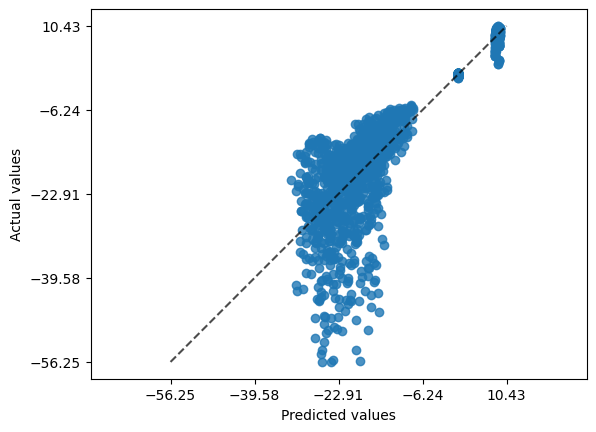

R2 Score: 0.12837905927830887
Mean Absolute Error: 2.289957237285449
Mean Squared Error: 23.792885180515203
Mean Absolute Percentage Error: 0.1979548564918394
Mean Absolute Error: 1.6864461780164215
Explained Varaince Score: 0.12919817464201475



In [71]:
Lasso_reg = linear_model.Lasso(alpha = 0.135)
Lasso_reg.fit(x_train_scaled, y_train)

print_metrics("Lasso", Lasso_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Ridge Regression

Ridge Linear


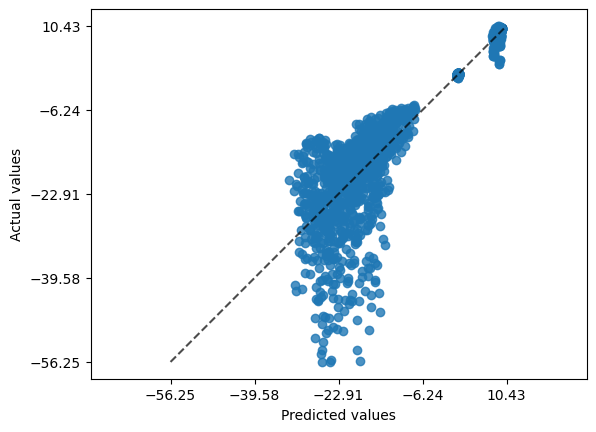

R2 Score: 0.19037776361253
Mean Absolute Error: 2.2744933693736615
Mean Squared Error: 23.76794463654855
Mean Absolute Percentage Error: 0.18926475253306427
Mean Absolute Error: 1.6545581428942426
Explained Varaince Score: 0.19111743122080585



In [8]:
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(x_train_scaled, y_train)

print_metrics("Ridge Linear", ridge_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Lasso Lars

Lasso Lars Linear


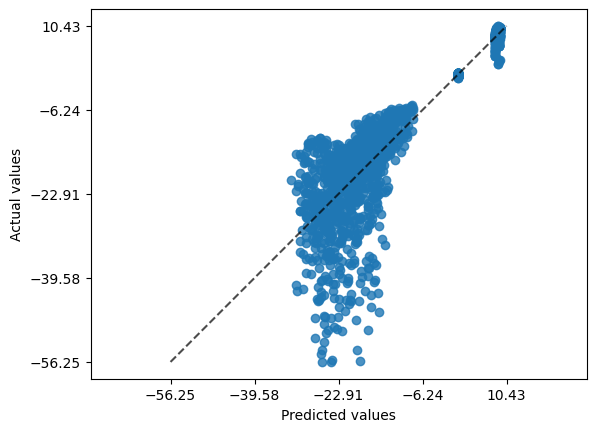

R2 Score: 0.13390765872504531
Mean Absolute Error: 2.2861823383524373
Mean Squared Error: 23.78251401787486
Mean Absolute Percentage Error: 0.19742976851983732
Mean Absolute Error: 1.6793270199593382
Explained Varaince Score: 0.1347259175617446



In [9]:
lasso_lars_reg = linear_model.LassoLars(alpha=.1)
lasso_lars_reg.fit(x_train_scaled, y_train)

print_metrics("Lasso Lars Linear", lasso_lars_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Bayesian Ridge

Lasso Lars Bayesian Ridge


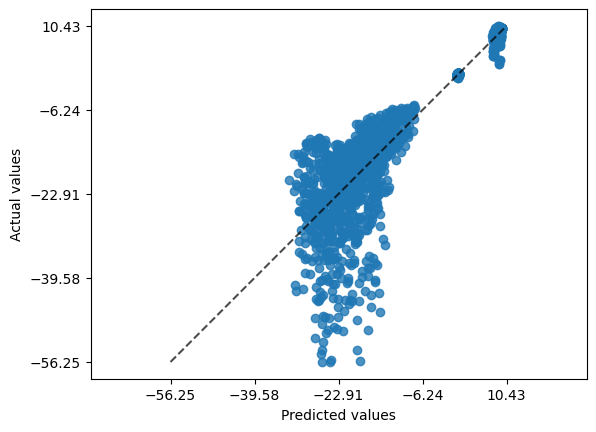

R2 Score: 0.19043719486261754
Mean Absolute Error: 2.2746755522074062
Mean Squared Error: 23.767043587128
Mean Absolute Percentage Error: 0.18932842549330975
Mean Absolute Error: 1.6548313475791367
Explained Varaince Score: 0.1911767117764378



In [16]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

bayesian_redge_reg = MultiOutputRegressor(linear_model.BayesianRidge())
bayesian_redge_reg.fit(x_train_scaled, y_train)

print_metrics("Lasso Lars Bayesian Ridge", bayesian_redge_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Logistic Regression

In [17]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

logistic_reg = MultiOutputRegressor(linear_model.LogisticRegression(C=0.2, penalty="l1", tol=0.01, solver="saga"))
logistic_reg.fit(x_train_scaled, y_train)

print_metrics("Logistic Regression", logistic_reg, x_test_scaled = x_test_scaled, y_test = y_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

### Tweedie Regressor


In [35]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

tweedie_reg = MultiOutputRegressor(linear_model.TweedieRegressor(power=3, alpha=0.5, link='log'))
tweedie_reg.fit(x_train_scaled, y_train)

print_metrics("Tweedie Regression", tweedie_reg, x_test_scaled = x_test_scaled, y_test = y_test)

ValueError: Some value(s) of y are out of the valid range of the loss 'HalfTweedieLoss'.

### Poisson Regressor

In [31]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

poisson_reg = MultiOutputRegressor(linear_model.PoissonRegressor(alpha=1e-5, solver="newton-cholesky"))
                 
poisson_reg.fit(x_train_scaled, y_train)
print_metrics("Tweedie Regression", poisson_reg, x_test_scaled = x_test_scaled, y_test = y_test)

ValueError: Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.

### Hist Gradient Boosting Regressor

Hist Regression


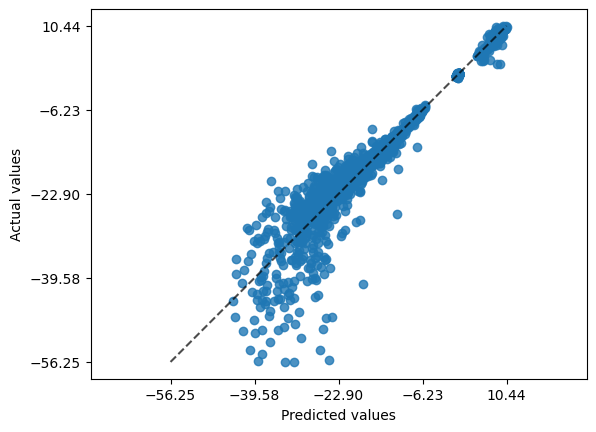

R2 Score: 0.7644004672538074
Mean Absolute Error: 0.9265155784701188
Mean Squared Error: 6.741784861838734
Mean Absolute Percentage Error: 0.06619496294081674
Mean Absolute Error: 0.3917519706915309
Explained Varaince Score: 0.7648493156775434



In [64]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

hgbr_reg = MultiOutputRegressor(HistGradientBoostingRegressor(loss="squared_error", max_leaf_nodes=128))
hgbr_reg.fit(x_train_scaled, y_train)
print_metrics("Hist Regression", hgbr_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Perceptron

In [61]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

perceptron_reg = MultiOutputRegressor(linear_model.Perceptron(tol=1e-3, random_state=0))
perceptron_reg.fit(x_train_scaled, y_train)
print_metrics("Stochastic Gradient Descent Regressor", perceptron_reg, x_test_scaled = x_test_scaled, y_test = y_test)

ValueError: Unknown label type: (array([0.1441, 0.2251, 0.2269, 0.2359, 0.2377, 0.253 , 0.2584, 0.2593,
       0.4258, 0.5032, 0.5041, 0.505 , 0.5059, 0.5068, 0.5077, 0.5086,
       0.5095, 0.5104, 0.5113, 0.5122, 0.5131, 0.514 , 0.5149, 0.5158,
       0.5167, 0.5176, 0.5185, 0.5194, 0.5203, 0.5212, 0.5221, 0.523 ,
       0.5239, 0.5248, 0.5257, 0.5266, 0.5275, 0.5284, 0.5293, 0.5302,
       0.5311, 0.532 , 0.5329, 0.5338, 0.5347, 0.5356, 0.5365, 0.5374,
       0.5383, 0.5392, 0.5401, 0.541 , 0.5419, 0.5428, 0.5437, 0.5446,
       0.5455, 0.5464, 0.5473, 0.5482, 0.5491, 0.55  , 0.5509, 0.5518,
       0.5527, 0.5536, 0.5545, 0.5554, 0.5563, 0.5572, 0.5581, 0.559 ,
       0.5599, 0.5608, 0.5617, 0.5626, 0.5635, 0.5644, 0.5653, 0.5662,
       0.5671, 0.568 , 0.5689, 0.5698, 0.5707, 0.5716, 0.5725, 0.5734,
       0.5743, 0.5752, 0.5761, 0.577 , 0.5779, 0.5788, 0.5797, 0.5806,
       0.5815, 0.5824, 0.5833, 0.5842, 0.5851, 0.586 , 0.5869, 0.5878,
       0.5887, 0.5896, 0.5905, 0.5914, 0.5923, 0.5932, 0.5941, 0.595 ,
       0.5959, 0.5968, 0.5977, 0.5986, 0.5995, 0.6004, 0.6013, 0.6022,
       0.6031, 0.604 , 0.6049, 0.6058, 0.6067, 0.6076, 0.6085, 0.6094,
       0.6103, 0.6112, 0.6121, 0.613 , 0.6139, 0.6148, 0.6166, 0.6175,
       0.6184, 0.6202, 0.622 , 0.6229, 0.6238, 0.6247, 0.6256, 0.6265,
       0.6274, 0.6283, 0.6292, 0.631 , 0.6319, 0.6328, 0.6346, 0.6364,
       0.6373, 0.6382, 0.6391, 0.6409, 0.649 , 0.6508, 0.6517, 0.6526,
       0.6571, 0.7453, 0.7462, 0.7525, 0.7615, 0.766 , 0.7723, 0.7732,
       0.7759, 0.7777, 0.784 , 0.7867, 0.7984, 0.8047, 0.8056, 0.8065,
       0.8074, 0.8083, 0.8092, 0.811 , 0.8119, 0.8128, 0.8137, 0.8146,
       0.8155, 0.8164, 0.8173, 0.8182, 0.8191, 0.82  , 0.8209, 0.8218,
       0.8227, 0.8236, 0.8245, 0.8254, 0.8263, 0.8272, 0.8281, 0.829 ,
       0.8299, 0.8308, 0.8317, 0.8326, 0.8335, 0.8344, 0.8353, 0.8362,
       0.8371, 0.838 , 0.8389, 0.8398, 0.8407, 0.8416, 0.8425, 0.8434,
       0.8443, 0.8452, 0.8461, 0.847 , 0.8479, 0.8488, 0.8497, 0.8506,
       0.8515, 0.8524, 0.8533, 0.8542, 0.8551, 0.856 , 0.8569, 0.8578,
       0.8587, 0.8596, 0.8605, 0.8614, 0.8623, 0.8632, 0.8641, 0.865 ,
       0.8659, 0.8668, 0.8677, 0.8686, 0.8695, 0.8704, 0.8713, 0.8722,
       0.8731, 0.874 , 0.8749, 0.8758, 0.8767, 0.8776, 0.8785, 0.8794,
       0.8803, 0.8812, 0.8821, 0.883 , 0.8839, 0.8848, 0.8857, 0.8866,
       0.8875, 0.8884, 0.8893, 0.8902, 0.8911, 0.892 , 0.8929, 0.8938,
       0.8947, 0.8956, 0.8965, 0.8974, 0.8983, 0.8992, 0.9001, 0.901 ,
       0.9019, 0.9028, 0.9037, 0.9046, 0.9055, 0.9064, 0.9073, 0.9082,
       0.9091, 0.91  , 0.9109, 0.9118, 0.9127, 0.9136, 0.9145, 0.9154,
       0.9163, 0.9172, 0.9181, 0.919 , 0.9199, 0.9208, 0.9217, 0.9226,
       0.9235, 0.9244, 0.9253, 0.9262, 0.9271, 0.928 , 0.9289, 0.9298,
       0.9307, 0.9316, 0.9325, 0.9334, 0.9343, 0.9352, 0.9361, 0.937 ,
       0.9379, 0.9388, 0.9397, 0.9406, 0.9415, 0.9424, 0.9433, 0.9442,
       0.9451, 0.946 , 0.9469, 0.9478, 0.9487, 0.9496, 0.9505, 0.9514,
       0.9523, 0.9532, 0.9541, 0.955 , 0.9559, 0.9568, 0.9577, 0.9586,
       0.9595, 0.9604, 0.9613, 0.9622, 0.9631, 0.964 , 0.9649, 0.9658,
       0.9667, 0.9676, 0.9685, 0.9694, 0.9703, 0.9712, 0.9721, 0.973 ,
       0.9739, 0.9748, 0.9757, 0.9766, 0.9775, 0.9784, 0.9793, 0.9802,
       0.9811, 0.982 , 0.9829, 0.9838, 0.9847, 0.9856, 0.9865, 0.9874,
       0.9883, 0.9892, 0.9901, 0.991 , 0.9919, 0.9928, 0.9937, 0.9946,
       0.9955, 0.9964, 0.9973, 0.9982, 0.9991]),)

### Stochastic Gradient Descent Regressor

Stochastic Gradient Descent Regressor


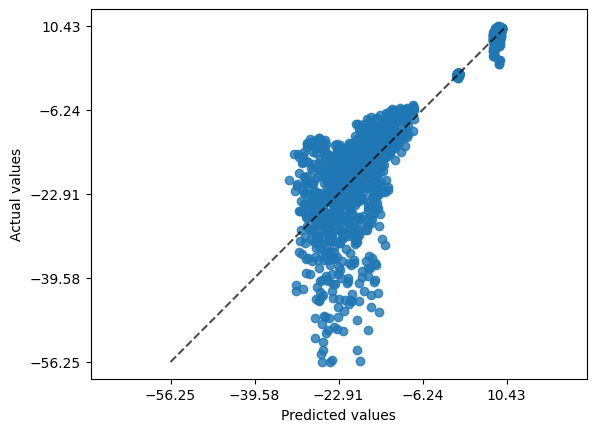

R2 Score: 0.19067533401049575
Mean Absolute Error: 2.2773469615686053
Mean Squared Error: 23.76164759195683
Mean Absolute Percentage Error: 0.18968864480879108
Mean Absolute Error: 1.6615011534775734
Explained Varaince Score: 0.19147663227763836



In [40]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

sgd_reg = MultiOutputRegressor(linear_model.SGDRegressor(max_iter=10000, tol=0.1))
sgd_reg.fit(x_train_scaled, y_train)
print_metrics("Stochastic Gradient Descent Regressor", sgd_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Passive Aggresive Regression

Passive Aggresive


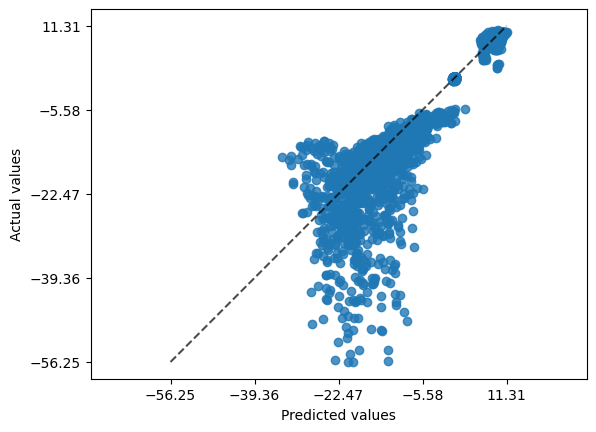

R2 Score: -0.2884953681911024
Mean Absolute Error: 2.6768221183134213
Mean Squared Error: 34.22563400987398
Mean Absolute Percentage Error: 0.21266961075916688
Mean Absolute Error: 1.8087931756998803
Explained Varaince Score: -0.20721850367653805



In [48]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

pas_reg = MultiOutputRegressor(linear_model.PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3))
pas_reg.fit(x_train_scaled, y_train)

print_metrics("Passive Aggresive", pas_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### RANSAC: RANdom SAmple Consensus

RANSAC


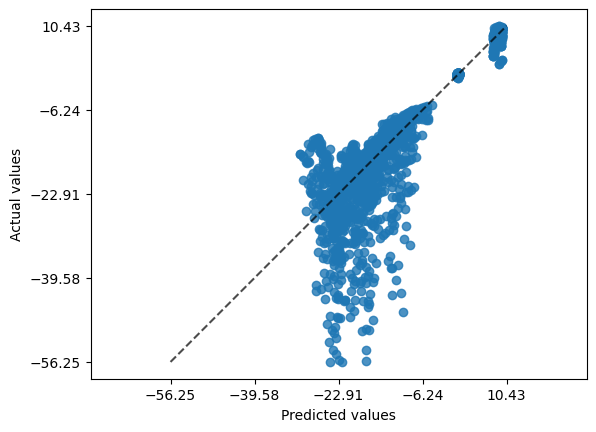

R2 Score: 0.1365832230840558
Mean Absolute Error: 2.2412040907158235
Mean Squared Error: 27.427012081558377
Mean Absolute Percentage Error: 0.17118214990130223
Mean Absolute Error: 1.27255315600081
Explained Varaince Score: 0.1648058934357932



In [42]:
ransac_reg = linear_model.RANSACRegressor(random_state=56)
ransac_reg.fit(x_train_scaled, y_train)

print_metrics("RANSAC", ransac_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Theil-Sen Regression

Theil-SEN


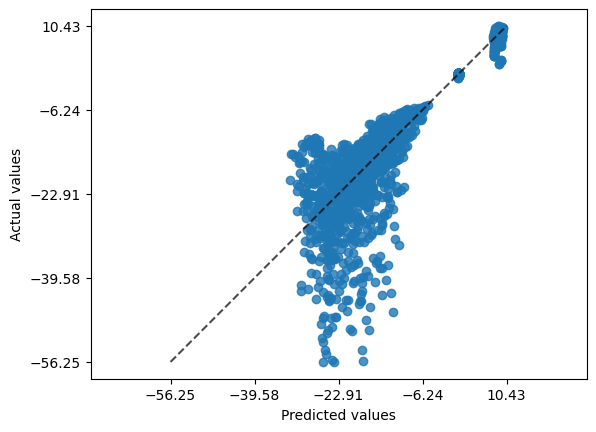

R2 Score: 0.16060095176764352
Mean Absolute Error: 2.2121564015726047
Mean Squared Error: 24.89122510281598
Mean Absolute Percentage Error: 0.17763824277431936
Mean Absolute Error: 1.4200206190400901
Explained Varaince Score: 0.17971599075365008



In [45]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

theil_sen_reg = MultiOutputRegressor(linear_model.TheilSenRegressor(random_state=42))
theil_sen_reg.fit(x_train_scaled, y_train)

print_metrics("Theil-SEN", theil_sen_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Huber Regressor

Huber Regressor


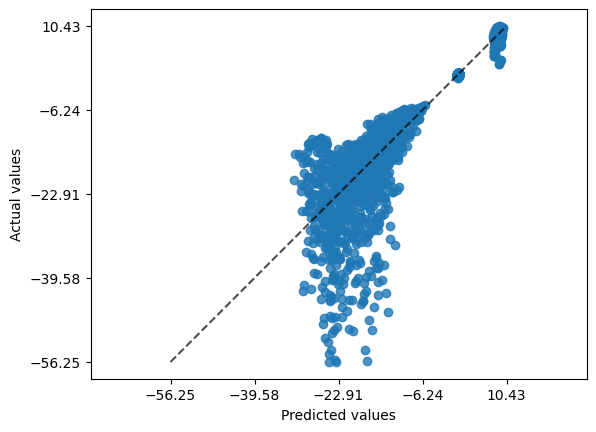

R2 Score: 0.16878135059782665
Mean Absolute Error: 2.2018289051845152
Mean Squared Error: 24.7905854403203
Mean Absolute Percentage Error: 0.17595855571790855
Mean Absolute Error: 1.4093871857480973
Explained Varaince Score: 0.18488938209206365



In [52]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

huber_reg = MultiOutputRegressor(linear_model.HuberRegressor())
huber_reg.fit(x_train_scaled, y_train)

print_metrics("Huber Regressor", huber_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Quantile

Quantile: 0.05
Quantile Regressor


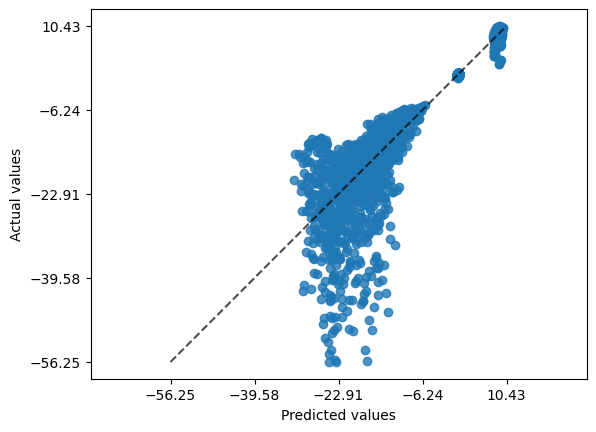

R2 Score: 0.16878135059782665
Mean Absolute Error: 2.2018289051845152
Mean Squared Error: 24.7905854403203
Mean Absolute Percentage Error: 0.17595855571790855
Mean Absolute Error: 1.4093871857480973
Explained Varaince Score: 0.18488938209206365

Quantile: 0.5
Quantile Regressor


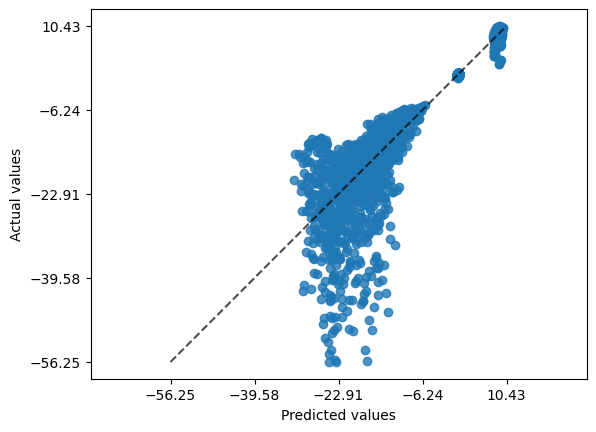

R2 Score: 0.16878135059782665
Mean Absolute Error: 2.2018289051845152
Mean Squared Error: 24.7905854403203
Mean Absolute Percentage Error: 0.17595855571790855
Mean Absolute Error: 1.4093871857480973
Explained Varaince Score: 0.18488938209206365

Quantile: 0.95
Quantile Regressor


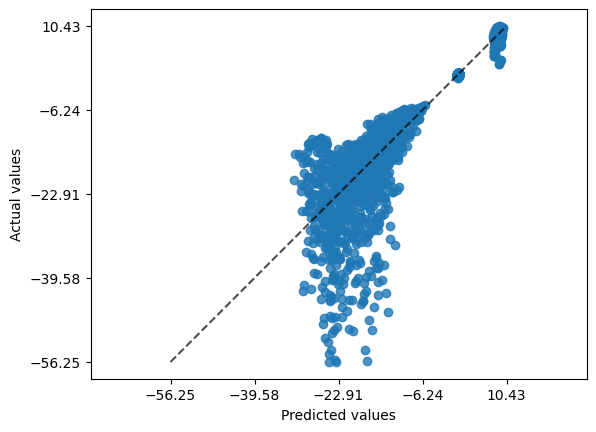

R2 Score: 0.16878135059782665
Mean Absolute Error: 2.2018289051845152
Mean Squared Error: 24.7905854403203
Mean Absolute Percentage Error: 0.17595855571790855
Mean Absolute Error: 1.4093871857480973
Explained Varaince Score: 0.18488938209206365



In [54]:
quantiles = [0.05, 0.5, 0.95]
solver = "highs"

for quantile in quantiles:
    print(f"Quantile: {quantile}")
    quantile_reg = linear_model.QuantileRegressor(quantile=quantile, alpha=0, solver=solver)

    huber_reg = MultiOutputRegressor(linear_model.HuberRegressor())
    huber_reg.fit(x_train_scaled, y_train)

    print_metrics("Quantile Regressor", huber_reg, x_test_scaled = x_test_scaled, y_test = y_test)

### Polynomial Features
    - piping polynomial features into HIST GB
    - piping ploynomial features into Linear Regression

Hist Regression


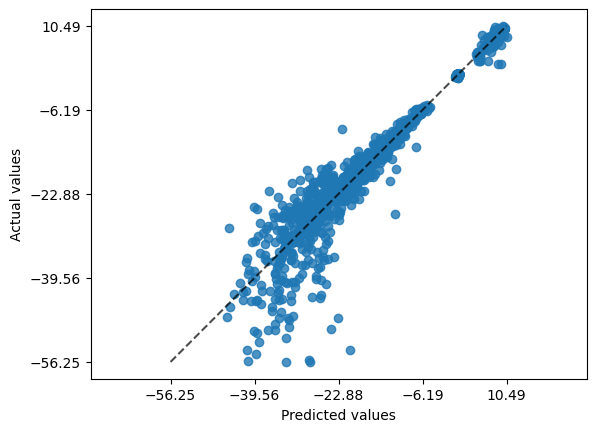

R2 Score: 0.7643880687651157
Mean Absolute Error: 0.8681403170456679
Mean Squared Error: 6.176698547915188
Mean Absolute Percentage Error: 0.06349806819810992
Mean Absolute Error: 0.34721317120403833
Explained Varaince Score: 0.7645127802797314

Linear (Polynomial)


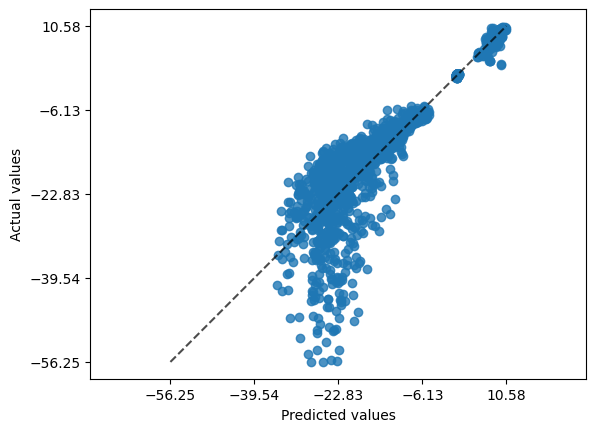

R2 Score: 0.48184084103203
Mean Absolute Error: 1.7974353667201888
Mean Squared Error: 17.449894100241245
Mean Absolute Percentage Error: 0.13752697942961675
Mean Absolute Error: 1.1830576492156124
Explained Varaince Score: 0.48262221307354386



In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

hgbr_reg = MultiOutputRegressor(HistGradientBoostingRegressor(loss="squared_error", max_leaf_nodes=128))
hgbr_reg.fit(poly.fit_transform(x_train_scaled), y_train)
print_metrics("Hist Regression", hgbr_reg, x_test_scaled = poly.fit_transform(x_test_scaled), y_test = y_test)

linear_poly = linear_model.LinearRegression(fit_intercept=False)
linear_poly.fit(poly.fit_transform(x_train_scaled), y_train)
print_metrics("Linear (Polynomial)", linear_poly, x_test_scaled = poly.fit_transform(x_test_scaled), y_test = y_test)